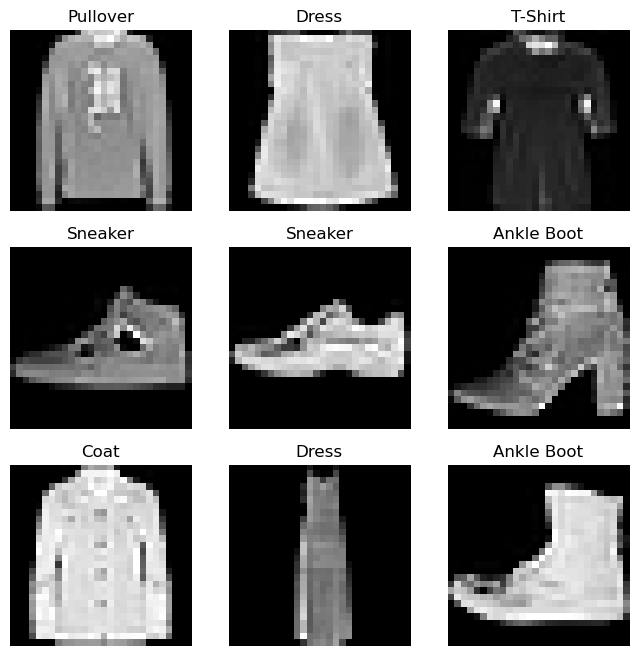

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [2]:
text = ["Happy", 'Amazing', 'Sad','Unhappy', 'Glum']
labels = ['Positive', 'Positive', 'Negative','Negative','Negative']
MyDataset = CustomDataset(text,labels)

NameError: name 'CustomDataset' is not defined

In [3]:
type(MyDataset)

NameError: name 'MyDataset' is not defined

In [4]:
MyDataLoader = DataLoader(MyDataset, batch_size = 2, shuffle= True)
next(iter(MyDataLoader))

NameError: name 'DataLoader' is not defined

## Custom Dataset


In [5]:
from torchvision.datasets import VisionDatas
from typing import Any, Callable, Dict, List, Optional, Tuple
import os

from tqdm import tqdm
import os
import sys
from pathlib import Path
import requests

from skimage import io, transform
import matplotlib.pyplot as plt

ImportError: cannot import name 'VisionDatas' from 'torchvision.datasets' (/Users/ys/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/__init__.py)

In [6]:
import tarfile

class NotMNIST(VisionDataset):
  resource_url = 'http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz'
  
  def __init__(
      self,
      root: str,
      train:bool = True,
      transform: Optional[Callable] = None,
      target_transform: Optional[Callable] = None,
      download: bool = False,
  ) -> None:
      super(NotMNIST, self).__init__(root, transform=transform,
                                     target_transform=target_transform)
      if not self._check_exists():
        self.download()
      if download:
        self.download()
      
      self.data, self.targets = self._laod_data()

  def __len__(self):
      return len(self.data)

  def __getitem__(self, index):
    image_name = self.data[index]
    image = io.imread(image_name)
    label = self.targets[index]
    if self.transform:
      image = self.transform(image)
    return image, label
  
  def _load_data(self):
    filepath = self.image_folder
    data = []
    targets = []

    for target in os.listdir(filepath):
      filenames = [os.path.abspath(
          os.path.join(filepath, target, x))for x in os.listdir(
              os.path.join(filepath, target))]
              
      targets.extend([target] * len(filenames))
      data.extend(filenames)
    return data, targets

  @property
  def raw_folder(self) -> str:
    return os.path.join(self, root, self.__class__.__name__, 'raw')

  @property
  def image_folder(self)-> None:
    os.makedirs(self.raw_folder, exist_ok=True)
    fname = self.resource_url.split("/")[-1]
    chunk_size = 1024
    
    filesize = int(requests.head(self.resource_url).geaders["Content-Length"])

    with requests.get(self.resource_url, stream=True) as r, open(
        os.path.join(self.raw_folder, fname), "wb") as f, tqdm(
             unit="B",
             unit_scale=True, 
             unit_divisor=1024, 
             total=filesize,
             file=sys.stdout, 
             desc=fname 
    ) as progress:
        for chunk in r.iter_content(chunk_size=chunk_size):
                    # download the file chunk by chunk
                    datasize = f.write(chunk)
                    # on each chunk update the progress bar.
                    progress.update(datasize)
                    
    self._extract_file(os.path.join (self.raw_folder, fname), target_path=self.root)


  def _extract_file(self, fname, target_path) -> None:
    if fname.endswith("tar.gz"):
      tag = "r:gz"
    elif fname.endswith("tar"):
      tag = "r:"
    tar = tarfile.open(fname, tag)
    tar.extractall(path=target_path)
    tar.close()
  def check_exists(self) -> bool:
    return os.path.exists(self.raw_folder)


NameError: name 'VisionDataset' is not defined